In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import os
import pandas as pd

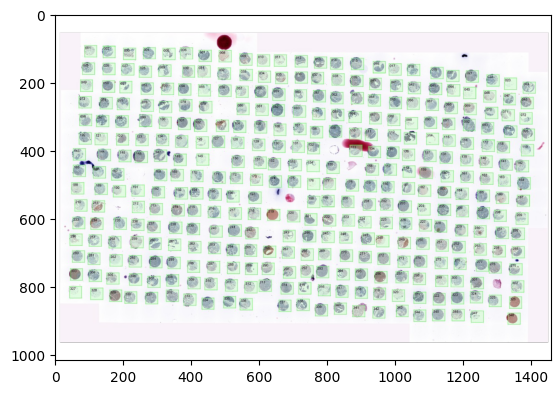

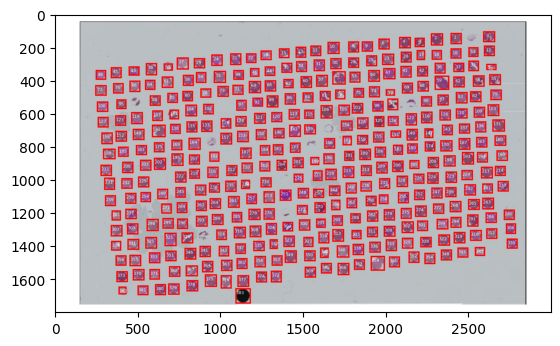

In [24]:
corr_fn = "MxIF_vHE_correspondance.csv"
df = pd.read_csv(corr_fn, sep=',')
corr_arr = df.values
print(corr_arr[0])

In [25]:
vHE_FOV_dir = r"\\mfad\researchmn\HCPR\HCPR-GYNECOLOGICALTUMORMICROENVIRONMENT\Archive\WSI_czi\HE_FOVs"
MxIF_FOV_dir = r"\\mfad\researchmn\HCPR\HCPR-GYNECOLOGICALTUMORMICROENVIRONMENT\Multiplex_Img\OVCA_TMA22\OME_TIFF_Images"

DAPI_idx = 0 # DAPI channel
vHE_FOV_fn_list = os.listdir(vHE_FOV_dir)

for c in corr_arr:
    mf = 'OVCA_TMA22_region_{0:03d}.ome.tiff'.format(c[0])
    print("MxIF image: %s" %mf)
    MxIF_FOV_fn = os.path.join(MxIF_FOV_dir, mf)
    vHE_FOV_fn = ""
    for vf in vHE_FOV_fn_list:
        if ("FOV%d" %c[1]) in vf:
            vHE_FOV_fn = os.path.join(vHE_FOV_dir, vf)
            print("vHE image: %s" %vf)
            break

    if os.path.exists(MxIF_FOV_fn) and os.path.exists(vHE_FOV_fn):
        MxIF_FOV = tf.imread(MxIF_FOV_fn)
        print(MxIF_FOV.shape)
        DAPI_img = np.squeeze(MxIF_FOV[0, :, :])
        plt.imshow(DAPI_img, cmap='gray')
        plt.show()

        vHE_FOV = tf.imread(vHE_FOV_fn)
        print(vHE_FOV.shape)
        plt.imshow(vHE_FOV, cmap='gray')
        plt.show()

    else:
        print("Can't find corresponding image pairs")

#####################
## Hard to find the correspondence between vHE and MxIF, as the FOV index doesn't match?



[292  60]


MxIF image: OVCA_TMA22_region_292.ome.tiff
HE image: FOV60_-159503_31389_2944_2816.tif
(39, 2040, 2040)


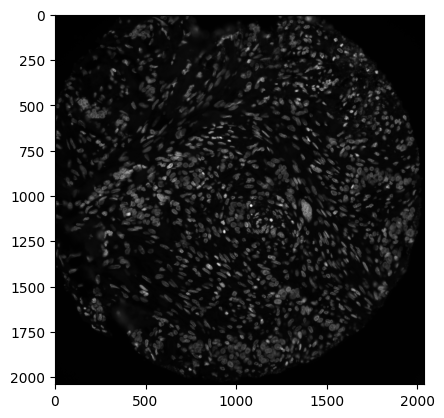

(2816, 2944, 3)


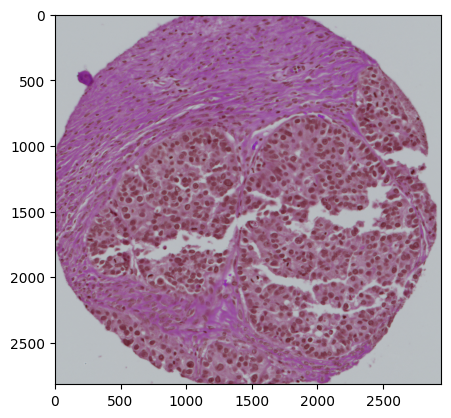

MxIF image: OVCA_TMA22_region_246.ome.tiff
HE image: FOV105_-157199_40989_2944_2944.tif
(39, 2040, 2040)


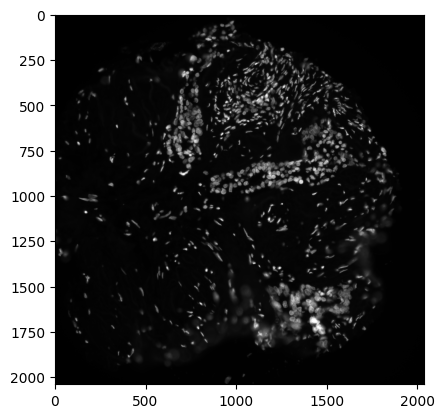

(2944, 2944, 3)


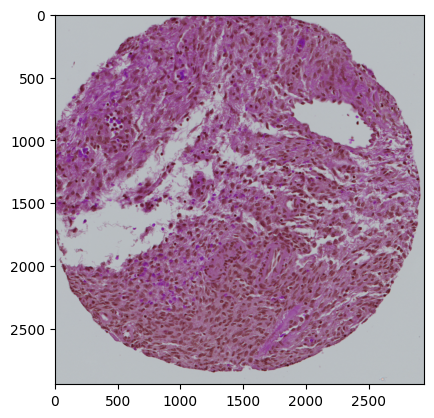

MxIF image: OVCA_TMA22_region_200.ome.tiff
HE image: FOV215_-149903_65053_2816_2944.tif
(39, 2040, 2040)


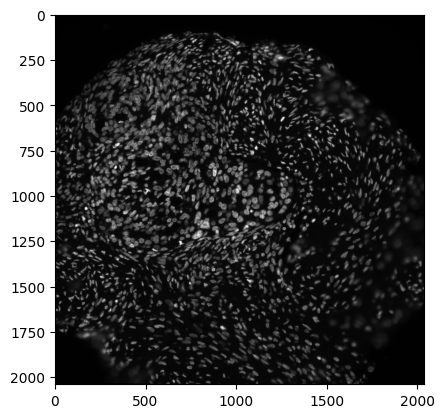

(2944, 2816, 3)


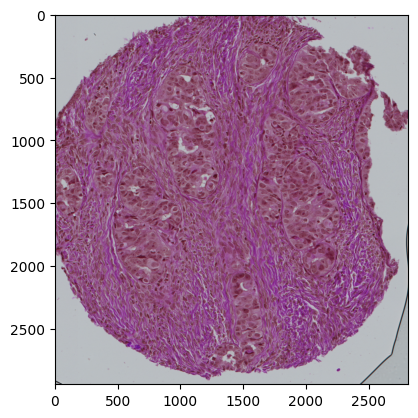

MxIF image: OVCA_TMA22_region_187.ome.tiff
HE image: FOV150_-156687_50973_2944_2816.tif
Can't find corresponding image pairs
	 Missing MxIF FOV:\\mfad\researchmn\HCPR\HCPR-GYNECOLOGICALTUMORMICROENVIRONMENT\Multiplex_Img\OVCA_TMA22\OME_TIFF_Images\OVCA_TMA22_region_187.ome.tiff
